# Probability axioms

1. 1 >= P(E) >= 0, The probability of an event is a non-negative real number
2. P(Omega) = 1, the probability that at least one of the elementary events in the entire sample space will occur is 1
3. Any countable sequence of disjoint sets (synonymous with mutually exclusive events) E1, E2,... satisfies
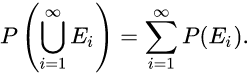

https://en.wikipedia.org/wiki/Probability_axioms

### P(A or B) = P(A) + P(B) - P(A and B)

The probability that A or B will happen is the sum of the probabilities that A will happen and that B will happen, minus the probability that both A and B will happen


### P(A and B) = P(A)xP(B)  <=> A and B are independent

Two events **A** and **B** are **independent** if and only if their joint probability equals the product of their probabilities: 



- A and B are independent <=> P(A|B) = P(A)

---

# Bayes' theorem

describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

### P(A|B) = P(B|A) * P(A) / P(B)

- **P(A|B)** is a conditional probability: the likelihood of event **A** occurring given that **B** is true.
- **P(B|A)** is a conditional probability: the likelihood of event **B** occurring given that **A** is true.
- **P(A) and P(B)** are the probabilities of observing **A** and **B** respectively; they are known as the marginal probability.

### Example: Drug testing

Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

P(D|+) = P(+|D) * P(D) / P(+)

P(D|+) = P(+|D) * P(D) / [ P(+|D) * P(D) + P(+|N) * P(N) ]

P(D|+) = 0.99 * 0.005 / (0.99 * 0.005 + 0.01 * 0.995) = 33.2%


https://en.wikipedia.org/wiki/Bayes%27_theorem

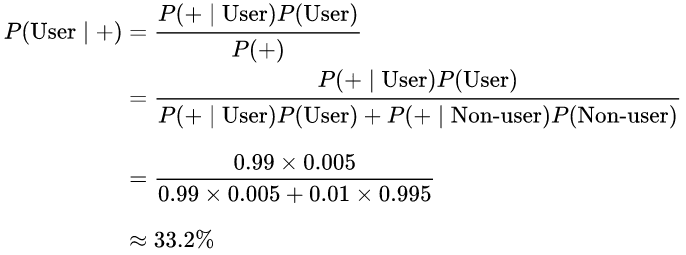

---

In [1]:
import drug_testing_simulation as simulation

settings = [
    {"population_size": 1000, "sensitivity": 0.99, "specificity": 0.99},
    {"population_size": 10000, "sensitivity": 0.99, "specificity": 0.99},
    {"population_size": 10000, "sensitivity": 1, "specificity": 0.99},
    {"population_size": 10000, "sensitivity": 0.99, "specificity": 0.995}
]

for setting in settings:
    simulation.run_simulation(**setting)

========== Running simulation ==========
population: 1000, sensitivity: 0.99, specificity: 0.99
Number of drug users: 8
Number of possitive tests: 20
Probability of being a real drug user with a positive test: 0.4
========== Running simulation ==========
population: 10000, sensitivity: 0.99, specificity: 0.99
Number of drug users: 46
Number of possitive tests: 147
Probability of being a real drug user with a positive test: 0.3129251700680272
========== Running simulation ==========
population: 10000, sensitivity: 1, specificity: 0.99
Number of drug users: 51
Number of possitive tests: 161
Probability of being a real drug user with a positive test: 0.3167701863354037
========== Running simulation ==========
population: 10000, sensitivity: 0.99, specificity: 0.995
Number of drug users: 56
Number of possitive tests: 104
Probability of being a real drug user with a positive test: 0.5384615384615384


### Example: Monty hall problem

Behind 1 of 3 doors, there is a car. Behind each of the other 2 doors, there is a goat. After choosing your door, the host would open a door and show your the goat behind it. Will the probability of winning a car be higher if you change your choice?

#### Case 1: Stick to your choice.

The event of winning only depends on choosing the car door at first.

P(winning) = P(choose a car from N doors) = 1/N

When N = 3, P(winning) = 1/3 = 0.333

When N = 5, P(winning) = 1/5 = 0.2

#### Case 2: make a new choice.

The event of winning consists of 2 sequencial events:

1. **Event A**: Choose a goat door at first
2. **Event B**: Make a new decision and choose the car door

P(A) = (N-1) / N

P(B|A) = 1 / (N-2)

P(winnin) = P(B|A) * P(A) = (1/N) * (N-1) / (N-2)

When N = 3, P(winnning) = 2/3 = 0.667

When N = 5, P(winning) = 4/15 = 0.267

In [2]:
import monty_hall_simulation as simulation

settings = [
    {"n_plays": 10000, "n_doors": 3, "make_new_choice": False},
    {"n_plays": 10000, "n_doors": 5, "make_new_choice": False},
    {"n_plays": 10000, "n_doors": 3, "make_new_choice": True},
    {"n_plays": 10000, "n_doors": 5, "make_new_choice": True}
]

for setting in settings:
    simulation.run_simulation(**setting)

Simulate 10000 plays without making new decisions when showed a goat door.
The probability of winning a car is 0.3293.
Simulate 10000 plays without making new decisions when showed a goat door.
The probability of winning a car is 0.1991.
Simulate 10000 plays with making new decisions when showed a goat door.
The probability of winning a car is 0.6708.
Simulate 10000 plays with making new decisions when showed a goat door.
The probability of winning a car is 0.2667.
